In [1]:
import os

import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = 'raise'  # forbid chained assignment to prevent implicit errors

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 6)  # set default figure size

import seaborn as sns
sns.set(font_scale=1.1)  # increase default font scale and set seaborn's plot style

from typing import List, Iterable

In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, VarianceThreshold
from matplotlib import pyplot


In [2]:
data_root_dp = os.path.join('/Users/sonya/RS_School/')  # change to yours path
print(f'data_root_dp: "{data_root_dp}"')
data_player_attributes_fp = os.path.join(data_root_dp, 'player_attributes.csv')
print(f'reading from: "{data_player_attributes_fp}"')
df = pd.read_csv(data_player_attributes_fp)
print(df.shape)

data_root_dp: "/Users/sonya/RS_School/"
reading from: "/Users/sonya/RS_School/player_attributes.csv"
(183978, 42)


In [6]:
# there are 3 'id' columns in data. 
# we will use 'player_api_id' only
# and drop other 'id' columns.
redundant_key_columns = ['id', 'player_fifa_api_id']

# also we will drop categorical columns for this task.
categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

cols_to_drop = redundant_key_columns + categorical_columns
print(f'will drop following columns: {cols_to_drop}')
df.drop(columns=cols_to_drop, inplace=True)

# rename 'player_api_id' column to shorter one: 'id'.
df.rename(columns={'player_api_id': 'id'}, inplace=True)

# cast string values to datetime
df['date'] = pd.to_datetime(df['date'])

# drop records that contain only NaNs in features
all_features = set(df.columns).difference(['id', 'date'])  # all columns without key columns
df.dropna(subset=all_features, how='all', inplace=True)

# the dataset we're working with migh get updated in future (new records might be added).
# thus we remove any records with date larger than the current max date in data (2016-07-07)
# for compatibility with current version of notebook.
df.drop(index=df[df['date'] > '2016-07-07'].index, inplace=True)
df['data_max'] = df.groupby('id')['date'].transform('max')
df = df[df['date'] == df['data_max']]


will drop following columns: ['id', 'player_fifa_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']


KeyError: "['player_fifa_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'] not found in axis"

In [9]:
# df = df.drop(columns=['id','date','data_max'])
df = df.dropna()

In [11]:
data_labels = df['agility']
fs = FeatureSelector(data = df, labels = data_labels)

NameError: name 'data' is not defined

In [15]:
target = 'agility'
features = df.columns.to_list()
features.remove('agility')

ix_split = int(0.7 * df.shape[0])
DF_TRAIN = df.iloc[:ix_split].copy()
DF_TEST = df.iloc[ix_split:].copy()
def get_train_test_data(features: List[str], target: str) -> tuple:
    """
    Return x_train, y_train, x_test, y_test using 
    * global train/test split 
    * features and target provided.
    """
    # in general, it's a bad practice to use global variables. 
    # however, we use it here with caution for simplicity.
    return (
        DF_TRAIN[features].copy(), DF_TRAIN[target].copy(), 
        DF_TEST[features].copy(), DF_TEST[target].copy()
    )

x_train, y_train, x_test, y_test = get_train_test_data(features, target)

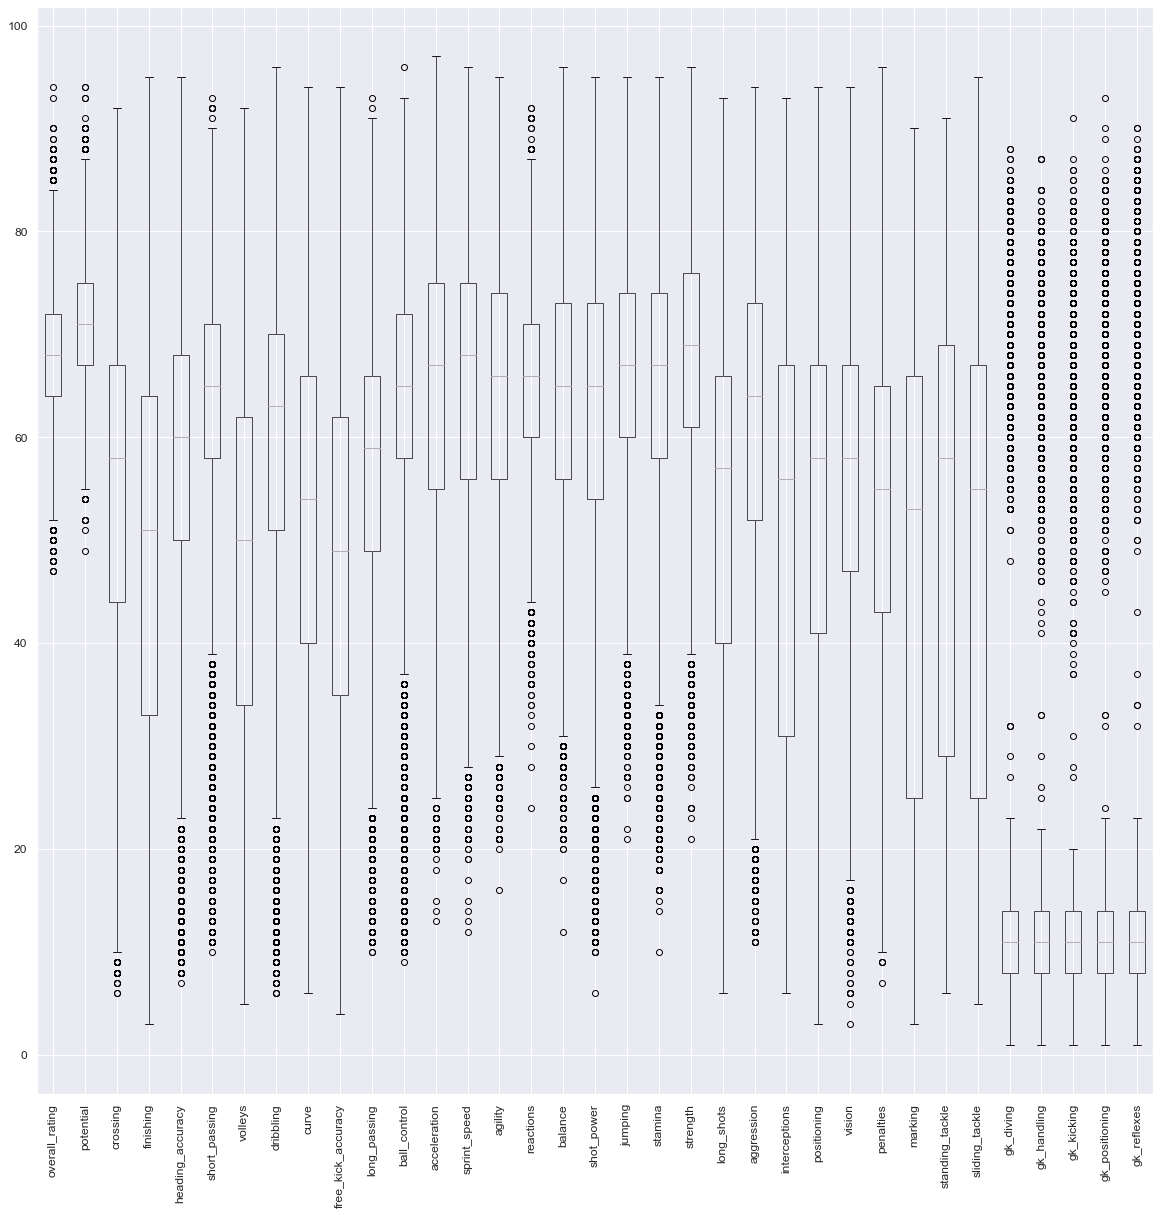

In [122]:
cols = df.columns.to_list()
boxplot = df.boxplot(column=cols, figsize=(20,20),rot=90)  
# есть выбросы

In [ ]:
cols = df.columns.to_list()
fig, axes = plt.subplots(nrows=1, ncols=len(cols),figsize=(12, 3))
for index, column in enumerate(cols):
    sns.boxplot(x=column, y='Sex', data=data, palette="pastel",ax=axes[index])

In [139]:
# z-score
# from scipy.stats import zscore
# df.apply(zscore)
features[:10]

['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy']

In [129]:
# Skewness асимметрия распределения
df.skew(axis=0).sort_values(ascending=False)

gk_reflexes           2.848197
gk_positioning        2.841014
gk_kicking            2.840538
gk_diving             2.836926
gk_handling           2.828371
potential             0.246959
overall_rating        0.071488
free_kick_accuracy   -0.207867
marking              -0.215931
sliding_tackle       -0.252525
reactions            -0.266300
interceptions        -0.287506
finishing            -0.306629
volleys              -0.307153
standing_tackle      -0.357907
curve                -0.452707
balance              -0.471995
penalties            -0.482335
jumping              -0.544943
vision               -0.549797
agility              -0.574827
strength             -0.610087
long_shots           -0.634014
acceleration         -0.643745
positioning          -0.667740
sprint_speed         -0.690486
aggression           -0.705682
long_passing         -0.748542
crossing             -0.816899
stamina              -0.896317
shot_power           -1.036837
heading_accuracy     -1.082486
dribblin

In [132]:
def box_cox(df, lmbda=None, alpha=None):
   
    df_tr = pd.DataFrame(columns=df.columns)  #initialize empty data frame with same features as df
    for val in list(df.columns):
        df_tr[val] = stats.boxcox(df[val] - min(df[val]) + 0.1,lmbda, alpha)[0] #populate dataframe with transformed data
    return df_tr

In [134]:
# в нормальные распределения
from scipy import stats

df_tr = box_cox(df)
df_tr.skew(axis=0).sort_values(ascending=False)

overall_rating        0.006372
potential            -0.000627
reactions            -0.006337
jumping              -0.044550
strength             -0.060748
balance              -0.088395
vision               -0.132156
agility              -0.132832
sprint_speed         -0.135829
acceleration         -0.137811
stamina              -0.160971
gk_kicking           -0.170013
free_kick_accuracy   -0.172944
penalties            -0.182261
gk_handling          -0.203126
gk_positioning       -0.217488
long_passing         -0.228968
gk_diving            -0.233700
volleys              -0.238658
gk_reflexes          -0.246619
finishing            -0.249183
short_passing        -0.256545
curve                -0.265517
aggression           -0.269628
marking              -0.283605
interceptions        -0.286070
sliding_tackle       -0.313482
shot_power           -0.321529
positioning          -0.353314
standing_tackle      -0.362368
crossing             -0.364734
heading_accuracy     -0.365181
long_sho

---

Feature 0: 0.054509
Feature 1: 0.058700
Feature 2: 0.225219
Feature 3: 0.186177
Feature 4: 0.166935
Feature 5: 0.171779
Feature 6: 0.182672
Feature 7: 0.409929
Feature 8: 0.234162
Feature 9: 0.169171
Feature 10: 0.110702
Feature 11: 0.279119
Feature 12: 0.535337
Feature 13: 0.385652
Feature 14: 0.036611
Feature 15: 0.414066
Feature 16: 0.137857
Feature 17: 0.039614
Feature 18: 0.157449
Feature 19: 0.139433
Feature 20: 0.174976
Feature 21: 0.061211
Feature 22: 0.078533
Feature 23: 0.256861
Feature 24: 0.180785
Feature 25: 0.138066
Feature 26: 0.098052
Feature 27: 0.111240
Feature 28: 0.100524
Feature 29: 0.094547
Feature 30: 0.105512
Feature 31: 0.085838
Feature 32: 0.092016
Feature 33: 0.080128


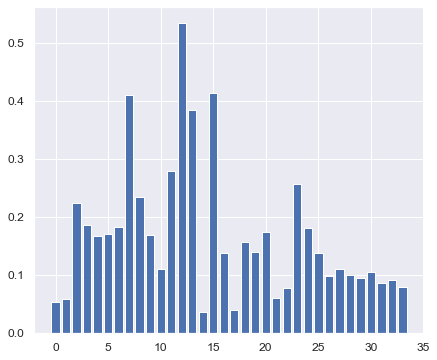

In [18]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [138]:
X = df[features]
y = df['agility']

mutual_info = mutual_info_regression(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)



acceleration          0.544650
dribbling             0.410629
balance               0.409334
sprint_speed          0.382232
ball_control          0.296347
positioning           0.256334
crossing              0.246608
curve                 0.221164
long_shots            0.203624
finishing             0.198577
volleys               0.186826
vision                0.170168
heading_accuracy      0.165643
free_kick_accuracy    0.164278
short_passing         0.163340
strength              0.146930
penalties             0.143074
stamina               0.138142
shot_power            0.128878
standing_tackle       0.128855
long_passing          0.119041
gk_diving             0.113041
sliding_tackle        0.108792
gk_reflexes           0.102846
marking               0.098007
gk_handling           0.095845
interceptions         0.094690
gk_positioning        0.090724
gk_kicking            0.081344
aggression            0.072924
potential             0.065612
overall_rating        0.046862
reaction

 SelectKBest 

In [28]:
selector = SelectKBest(f_regression, k=20)
X_reduced = selector.fit_transform(x_train, y_train)
X_reduced.shape

(7407, 20)

In [29]:
cols_sel = selector.get_support(indices=True)
selected_columns = x_train.iloc[:,cols_sel].columns.tolist()
selected_columns

['crossing',
 'finishing',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'balance',
 'shot_power',
 'stamina',
 'strength',
 'long_shots',
 'positioning',
 'vision',
 'penalties',
 'gk_positioning']

---

Percentile

In [37]:
selector = SelectPercentile(f_regression, percentile=40)
X_reduced = selector.fit_transform(x_train, y_train)
cols_p = selector.get_support(indices=True)
selected_columns_p = x_train.iloc[:,cols_p].columns.tolist()
print(len(selected_columns_p))
selected_columns_p

14


['crossing',
 'finishing',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'balance',
 'long_shots',
 'positioning',
 'vision']

---

VarianceThreshold

In [51]:
selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(x_train, y_train)
cols_v = selector.get_support(indices=True)
selected_columns_v = x_train.iloc[:,cols_v].columns.tolist()
print(len(selected_columns_v))
selected_columns_v

34


['overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [52]:
concol = [column for column in x_train.columns 
          if column not in x_train.columns[selector.get_support()]]

for features in concol:
    print(features)

In [50]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

---

SelectKBest

In [80]:
selector = SelectKBest(score_func=f_regression, k=10)
x_reduced = selector.fit_transform(x_train, y_train)
res = list(zip(selector.get_support(),features))
print(res)

[(False, 'overall_rating'), (False, 'potential'), (True, 'crossing'), (True, 'finishing'), (False, 'heading_accuracy'), (False, 'short_passing'), (False, 'volleys'), (True, 'dribbling'), (True, 'curve'), (False, 'free_kick_accuracy'), (False, 'long_passing'), (True, 'ball_control'), (True, 'acceleration'), (True, 'sprint_speed'), (False, 'reactions'), (True, 'balance'), (False, 'shot_power'), (False, 'jumping'), (False, 'stamina'), (False, 'strength'), (True, 'long_shots'), (False, 'aggression'), (False, 'interceptions'), (True, 'positioning'), (False, 'vision'), (False, 'penalties'), (False, 'marking'), (False, 'standing_tackle'), (False, 'sliding_tackle'), (False, 'gk_diving'), (False, 'gk_handling'), (False, 'gk_kicking'), (False, 'gk_positioning'), (False, 'gk_reflexes')]


In [73]:
x_reduced_test = selector.fit_transform(x_test, y_test)


/var/folders/wl/27ymcjln6px3tcfww0c_jg5c0000gn/T/ipykernel_42955/3095715423.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (x_reduced_test == x_reduced): print ('hi')


---

Transform

In [135]:
from scipy import stats

target = 'agility'
features = df.columns.to_list()
features.remove('agility')

def get_train_test_df(features: List[str], target: str, df) -> tuple:
    """
    Return x_train, y_train, x_test, y_test using 
    * global train/test split 
    * features and target provided.
    """
    # in general, it's a bad practice to use global variables. 
    # however, we use it here with caution for simplicity.
    return (
        df[features].copy(), df[target].copy(), 
        df[features].copy(), df[target].copy()
    )

def box_cox(df, lmbda=None, alpha=None):
   
    df_tr = pd.DataFrame(columns=df.columns)  #initialize empty data frame with same features as df
    for val in list(df.columns):
        df_tr[val] = stats.boxcox(df[val] - min(df[val]) + 0.1,lmbda, alpha)[0] #populate dataframe with transformed data
    return df_tr


df_tr = box_cox(df)
x_train, y_train, x_test, y_test = get_train_test_df(features, target, df_tr)

In [136]:
selector = SelectKBest(score_func=f_regression, k=15)
X_reduced_t = selector.fit_transform(x_train, y_train)
# print(features_list[selector.get_support()])

cols_skb = selector.get_support(indices=True)

selector.get_support()

array([False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [137]:
df[features].columns.values[selector.get_support()]

array(['crossing', 'finishing', 'short_passing', 'volleys', 'dribbling',
       'curve', 'free_kick_accuracy', 'ball_control', 'acceleration',
       'sprint_speed', 'balance', 'stamina', 'long_shots', 'positioning',
       'vision'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge

#===========================================================================
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
model = LinearRegression(fit_intercept=True)rfe = RFE(model)
rfe.fit(X_train, y_train)

#===========================================================================
# now print out the features in order of ranking
#===========================================================================
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

#===========================================================================
# ok, this time let's choose the top 10 featues and use them for the model
#===========================================================================
n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

#===========================================================================
# use the model to predict the prices for the test data
#===========================================================================
predictions = rfe.predict(X_test)

#===========================================================================
# write out CSV submission file
#===========================================================================
output = pd.DataFrame({"Id":test_data.index, target:predictions})
output.to_csv('submission.csv', index=False)